# Image Annotator for Labelling Images Into User-Defined Categories

## Import packages and define essential helper functions

In [1]:
import cv2
from IPython.display import display, clear_output
from PIL import Image

import os, shutil
import json
import random
from datetime import datetime

In [2]:
def mkdict_from_user():
    userdict = {}
    while True:
        res = input("Enter 'class_labels:keyboard_shortcut', such as 'bag:b', or 'q' to quit -->  ")
        if res == 'q':
            break
        else:
            key, val = res.split(':')
            userdict[key] = val
    
    return userdict

In [3]:
def set_up_subdirs(target_dir):

    if target_dir.endswith('/'):
        target_dir = target_dir[:-1]
        
    os.mkdir(target_dir)
    
    for label in user_labels.keys():
        os.mkdir(f"{target_dir}/{label}")
    
    return

In [4]:
def get_userinput(user_labels):
    
    notes = 'default'
    
    valid_labels = tuple(user_labels.values())
    
    while True:
        KBN = Keyborad_Shortcut_For_Notes = '7'
        
        userinput = input(f"Valid Shortcuts: {valid_labels} <Append'{KBN}' for Notes> ... ")
        
        L = len(userinput)
        if L not in [1,2]:
            print('Invalid input, try again...')
            continue
        
        if userinput[0] not in valid_labels:
            print(f'Invalid input, valid labels are {valid_labels} try again...')
            continue
            
        if L==2:
            if userinput[1] != KBN:
                print(f"Invalid, second letter if present must be the keyboard shortcut for notes: '{KBN}' ")
            else:
                usernote  = input("Notes: ")
                if len(usernote)>0:
                    notes = usernote
                break
        
        else:
            break
        
    return userinput[0], notes
            

In [5]:
def inv_dict(my_map):
    inv_map = {v: k for k, v in my_map.items()}
    return inv_map

Notes are saved as a json file with a unique name using an appended timestamp. Advanced users can modify this to change where to save the notes or how to name it.

In [6]:
def save_notes(N):
    timestr = datetime.now().strftime("%m_%d_%Y_%H%M_%S")
    
    outname = f"./Notes_{timestr}.json"
    json.dump(N, open(outname, "w"))
    
    return

## Define the main driver function for labelling

In [7]:
def goLabel(user_labels, src_imgdir, target_dir, img_extension='.png'):
    #src_imgdir = f"./images/"
    
    inv_user_labels = inv_dict(user_labels)
    
    if src_imgdir.endswith('/'):
        src_imgdir = src_imgdir[:-1]
    
    Notes = {}
    
    imgfiles = [i for i in os.listdir(src_imgdir) if i.endswith(img_extension)]
    random.shuffle(imgfiles)
    sess_count = 0
    
    for imgfile in imgfiles:
        img = cv2.imread(f"{src_imgdir}/{imgfile}")
        img = cv2.resize(img, (0, 0), fx = 10, fy = 10) 
        
        display(Image.fromarray(img))
        print(f'Now Showing {imgfile}')
        
        label, notes = get_userinput(user_labels)
        
        if notes != 'default':
            Notes[imgfile] = notes
        
        subdir = inv_user_labels[label]
            
        print("Moving ...")
        shutil.move(f"{src_imgdir}/{imgfile}", f"{target_dir}/{subdir}")
        sess_count += 1
        
        if input("Press any key to continue or 'q' to quit") != 'q':
            clear_output()
            continue
        
        else:
            break
            
        clear_output()

        
    if len(Notes)>0:
        save_notes(Notes)
        
    print(f"You Labelled {sess_count} images in this round. Hooray!")

## Set up labels and keyboard shortcuts

In [8]:
user_labels = mkdict_from_user()
# For example, bag:b, dress:d, shoe:s, other:o

Enter 'class_labels:keyboard_shortcut', such as 'bag:b', or 'q' to quit -->   bag:b
Enter 'class_labels:keyboard_shortcut', such as 'bag:b', or 'q' to quit -->   dress:d
Enter 'class_labels:keyboard_shortcut', such as 'bag:b', or 'q' to quit -->   shoe:s
Enter 'class_labels:keyboard_shortcut', such as 'bag:b', or 'q' to quit -->   other:o
Enter 'class_labels:keyboard_shortcut', such as 'bag:b', or 'q' to quit -->   q


## Select a destination folder for labelled images

In [9]:
target_dir = input("Enter a valid path for target directory")

Enter a valid path for target directory labelled_images


## Setup subdirectories for each label.
If the subdirectories already exist from previously running this step, then you can skip the next step.

In [10]:
set_up_subdirs(target_dir)

## Main driver for labelling
### Rerun the following cell as many times as needed to label more batches of images

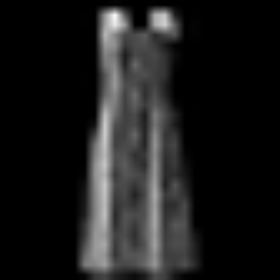

Now Showing img16.png


Valid Shortcuts: ('b', 'd', 's', 'o') <Append'7' for Notes> ...  d


Moving ...


Press any key to continue or 'q' to quit q


You Labelled 2 images in this round. Hooray!


In [11]:
goLabel(user_labels, './images', target_dir)